In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

## 1. 데이터 로드

In [108]:
df = pd.read_csv("csv/analysis_report.csv")

In [109]:
df.head()

,city,year,car_numbers,car_speed,school_numbers,stations,parks,total_accidents,child_accidents,schoolzone_accidents,child_population,total_population,city_tax,density,wedding
0,강남구,2017,238311,24.8,33,21,155,3469,40,8.000,56808,556164,1008244,14203,2677
1,강동구,2017,136558,24.3,27,11,124,1371,30,6.000,44348,436223,61985,17909,2427
2,강북구,2017,77820,20.9,14,3,83,1202,22,0.001,26970,324479,20470,13898,1436
3,강서구,2017,202063,24.3,36,9,167,1584,27,3.000,62698,601691,97215,14679,4069
4,관악구,2017,122103,24.8,22,4,110,1251,20,2.000,38126,503297,42789,17617,3205


## 2.데이터 전처리

### (1) 시각화

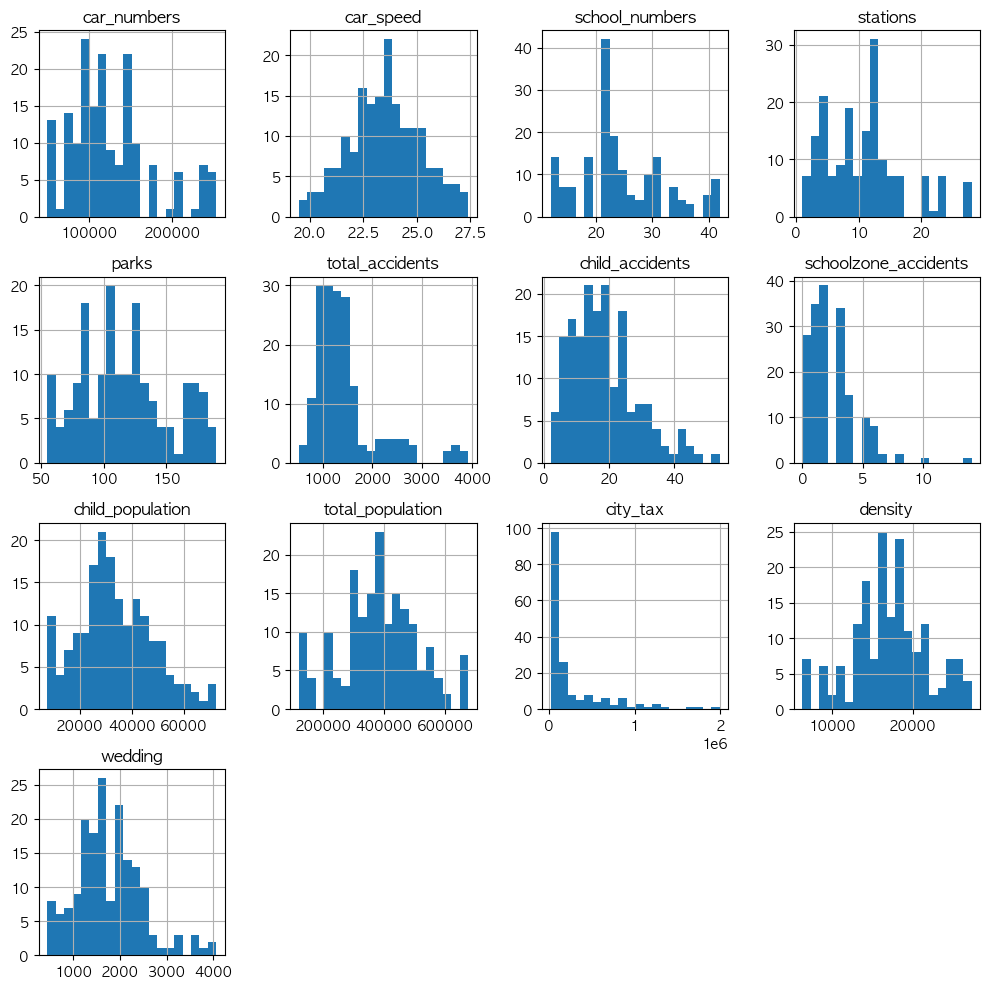

In [110]:
# city, year 열을 제외한 히스토그램 그리기
df.drop(columns=['city','year']).hist(bins=20, figsize=(10, 10))
plt.tight_layout()  # 그래프 간격 조정
plt.show()  # 그래프 표시

In [111]:
# city tax 분포가 오른쪽으로 긴 꼬리를 가지고 있으므로, city tax에 log 변환 시행
df.city_tax = np.log(df.city_tax)

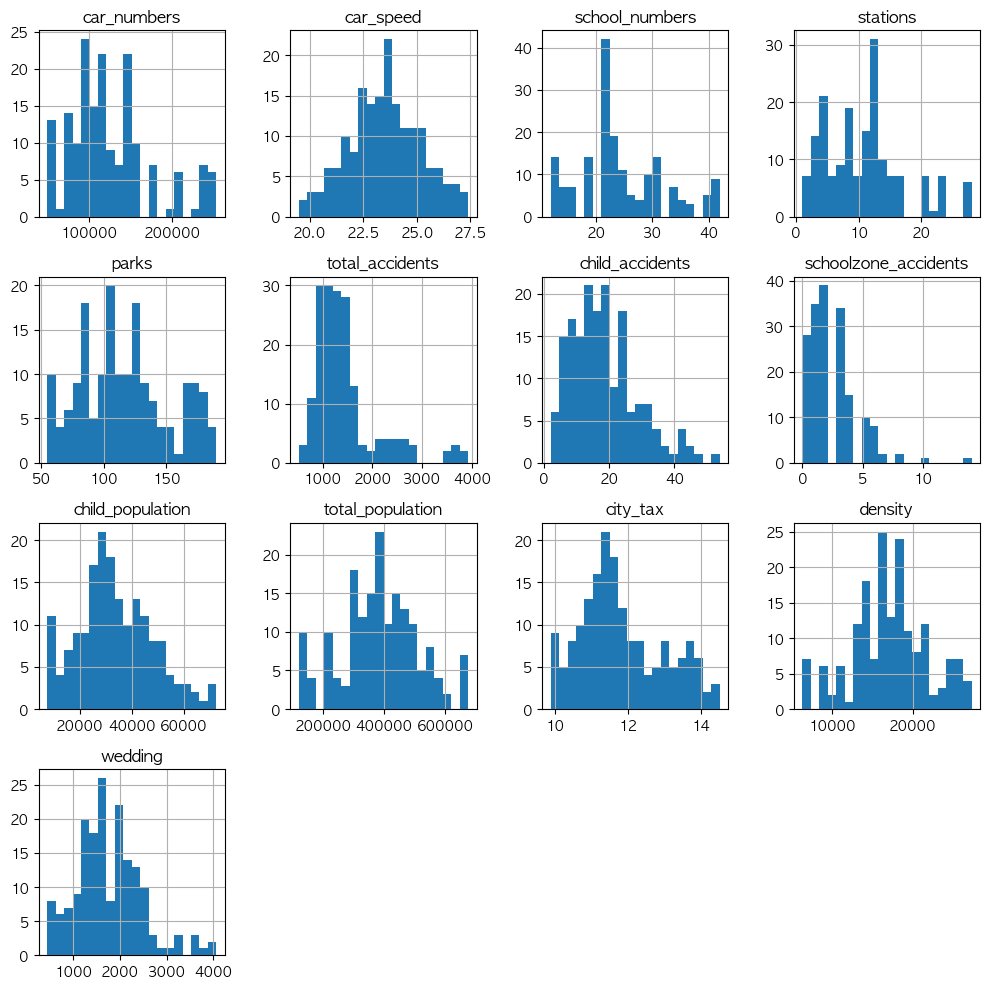

In [112]:
# city, year 열을 제외한 히스토그램 그리기
df.drop(columns=['city','year']).hist(bins=20, figsize=(10, 10))
plt.tight_layout()  # 그래프 간격 조정
plt.show()  # 그래프 표시

In [113]:
from matplotlib import rc
import seaborn as sns

# 한글 폰트 설정
#rc('font', family='Malgun Gothic')  # Windows: Malgun Gothic
rc('font', family='AppleGothic')  # Mac: AppleGothic

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [114]:
data = df.copy()

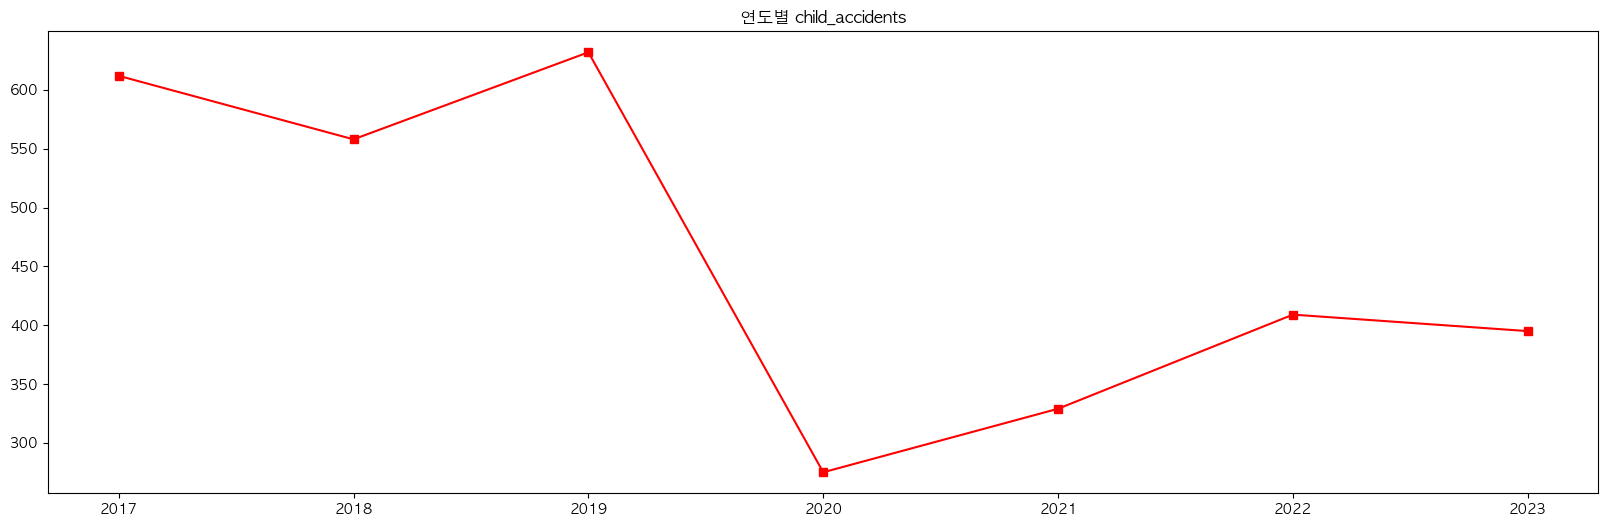

In [115]:
year_child_accidents = data.groupby('year').sum()['child_accidents']
plt.figure(figsize=(20, 6))  # 그래프 크기 설정
plt.title('연도별 child_accidents')
plt.plot(year_child_accidents.index, year_child_accidents, marker='s', color = 'r') 

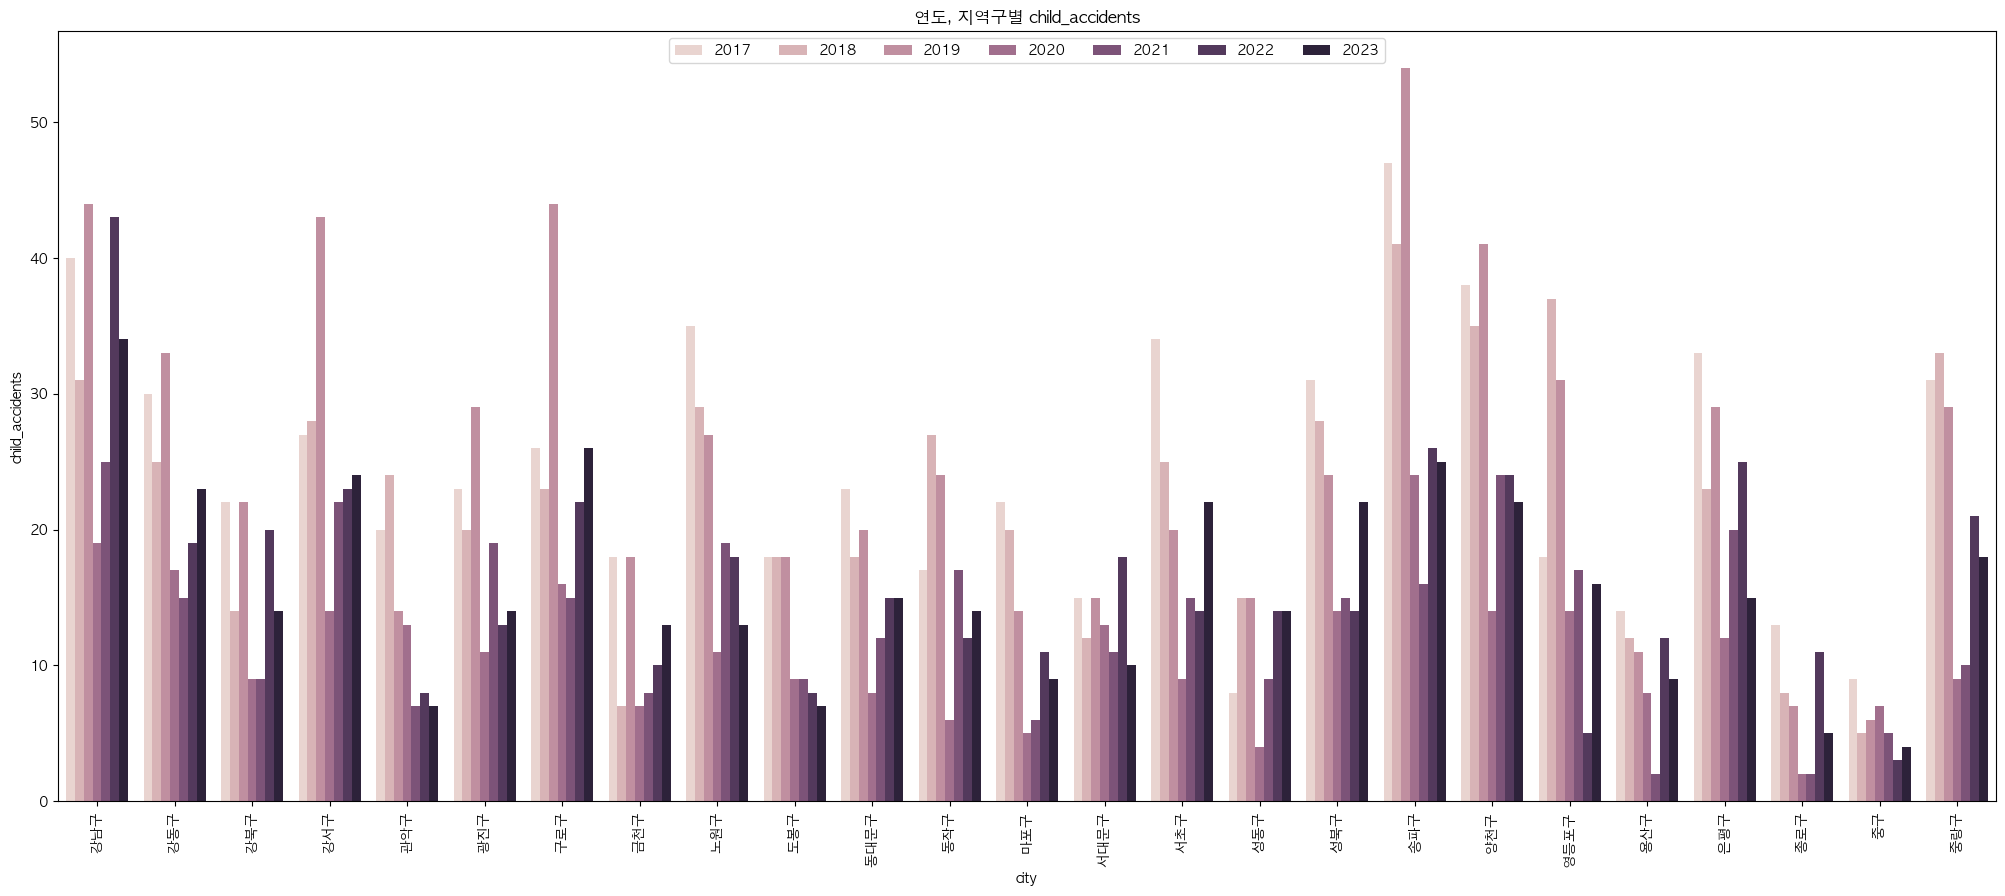

In [116]:
plt.figure(figsize=(25, 10))
sns.barplot(data, x = 'city', y = 'child_accidents', hue = 'year')
plt.title('연도, 지역구별 child_accidents')
plt.xticks(rotation = 90)
# plt.legend()
plt.legend(ncol=7, loc='upper center', bbox_to_anchor=(0.5, 1))
plt.show()


<Figure size 2000x2000 with 0 Axes>

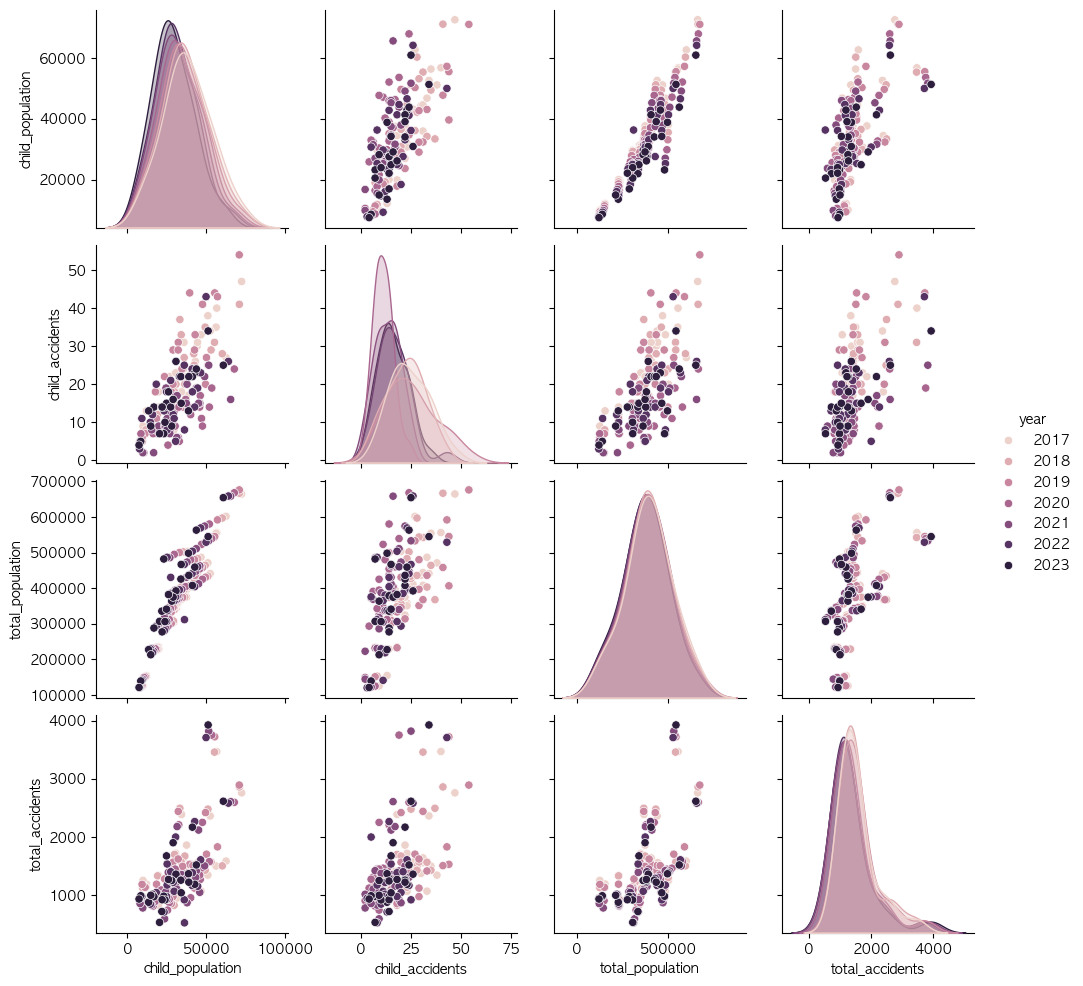

<Figure size 2000x2000 with 0 Axes>

In [117]:
sns.pairplot(data[['year', 'child_population', 'child_accidents', 'total_population', 'total_accidents']], hue = 'year')
plt.figure(figsize=(20, 20))  # 그래프 크기 설정

In [118]:
# 상관계수 계산
correlation_matrix = df.drop(['city', 'year'], axis = 1).corr()

In [119]:
correlation_matrix

,car_numbers,car_speed,school_numbers,stations,parks,total_accidents,child_accidents,schoolzone_accidents,child_population,total_population,city_tax,density,wedding
car_numbers,1.000000,0.205175,0.840478,0.395575,0.760910,0.794725,0.635056,0.410357,0.911175,0.884204,0.304935,0.080839,0.730246
car_speed,0.205175,1.000000,0.088142,-0.037771,0.168623,0.241694,0.165974,0.042939,0.267193,0.199945,0.135321,0.174723,0.308939
school_numbers,0.840478,0.088142,1.000000,0.285160,0.753085,0.495489,0.597462,0.371970,0.884010,0.904027,-0.039028,0.208224,0.677675
stations,0.395575,-0.037771,0.285160,1.000000,0.390816,0.508734,0.163131,0.032580,0.315412,0.201318,0.646921,-0.253005,0.190380
parks,0.760910,0.168623,0.753085,0.390816,1.000000,0.587776,0.405094,0.249839,0.747822,0.730976,0.265901,-0.269488,0.526850
total_accidents,0.794725,0.241694,0.495489,0.508734,0.587776,1.000000,0.566279,0.310678,0.657104,0.576820,0.545620,-0.077341,0.519627
child_accidents,0.635056,0.165974,0.597462,0.163131,0.405094,0.566279,1.000000,0.607618,0.724720,0.646555,-0.009108,0.256685,0.642471
schoolzone_accidents,0.410357,0.042939,0.371970,0.032580,0.249839,0.310678,0.607618,1.000000,0.411962,0.401278,0.016509,0.121687,0.390853
child_population,0.911175,0.267193,0.884010,0.315412,0.747822,0.657104,0.724720,0.411962,1.000000,0.932144,0.049707,0.203444,0.814120
total_population,0.884204,0.199945,0.904027,0.201318,0.730976,0.576820,0.646555,0.401278,0.932144,1.000000,-0.097411,0.262518,0.827416


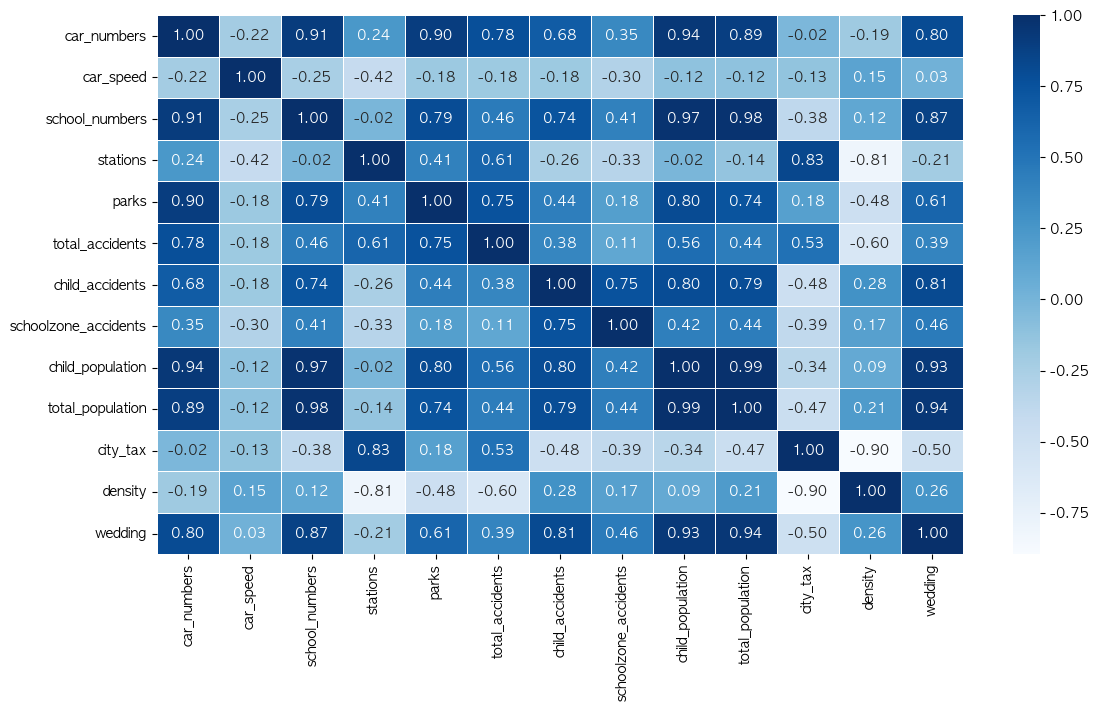

In [120]:
plt.figure(figsize=(13,7))
sns.heatmap(data = correlation_matrix.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

### (2) 종속변수인 어린이 교통사고 수 (child_accidents)를 제외하고 MinMaxScaler 진행

In [121]:
cols = ['car_numbers', 'car_speed', 'school_numbers', 'stations', 'parks', 'total_accidents', 'schoolzone_accidents', 
        'child_population', 'total_population', 'city_tax', 'density', 'wedding']
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

In [122]:
df.head()

,city,year,car_numbers,car_speed,school_numbers,stations,parks,total_accidents,child_accidents,schoolzone_accidents,child_population,total_population,city_tax,density,wedding
0,강남구,2017,0.923726,0.670886,0.700000,0.740741,0.740741,0.865746,40,0.571398,0.757433,0.784353,0.852676,0.376768,0.616423
1,강동구,2017,0.424457,0.607595,0.500000,0.370370,0.511111,0.249412,30,0.428531,0.566179,0.568447,0.251396,0.553270,0.547534
2,강북구,2017,0.136249,0.177215,0.066667,0.074074,0.207407,0.199765,22,0.000000,0.299437,0.367296,0.012543,0.362242,0.274456
3,강서구,2017,0.745869,0.607595,0.800000,0.296296,0.829630,0.311986,27,0.214230,0.847841,0.866306,0.348416,0.399438,1.000000
4,관악구,2017,0.353531,0.670886,0.333333,0.111111,0.407407,0.214160,20,0.142796,0.470675,0.689187,0.171498,0.539363,0.761918


## 3. 모델링

### 전체 데이터 중 20%는 테스트용, 80%는 학습용으로 나눔

In [123]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

### 모든 독립변수를 넣은 분석 결과
- ‘어린이 인구 수(child_population)’, ‘인구 수(total_population)’, ‘교통사고 수(total_accidents)’, ‘보호구역 사고 수(schoolzone_accidents)’를 포함한 모든 독립변수를 넣은 분석 결과임

#### (1) Random Forest

In [124]:
# 아래 변수들을 가지고 child_accident를 예측하는 모델 구축(인과관계)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
select_col = ['car_numbers', 'car_speed', 'school_numbers', 'stations', 'parks', 'total_accidents', 'schoolzone_accidents', 
        'child_population', 'total_population', 'city_tax', 'density', 'wedding']

# 모델학습
rf_model.fit(train.loc[:, select_col], train['child_accidents'])
predict = rf_model.predict(test.loc[:, select_col])

rmse :  6.686180417205968


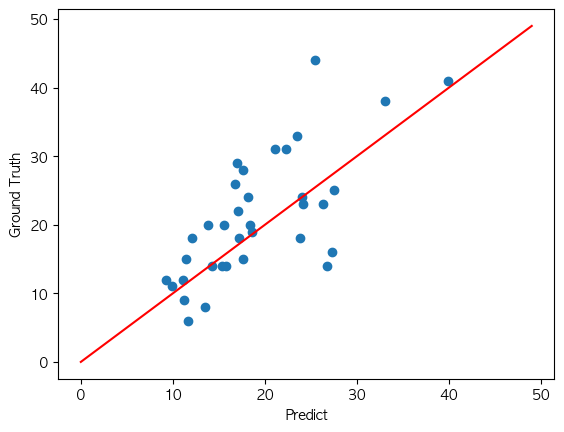

In [125]:
plt.scatter(predict, test['child_accidents'])
plt.xlabel('Predict')
plt.ylabel('Ground Truth')

x = np.arange(0,50)
y = x
plt.plot(x,y,'r')
print('rmse : ' ,root_mean_squared_error(predict, test['child_accidents']))

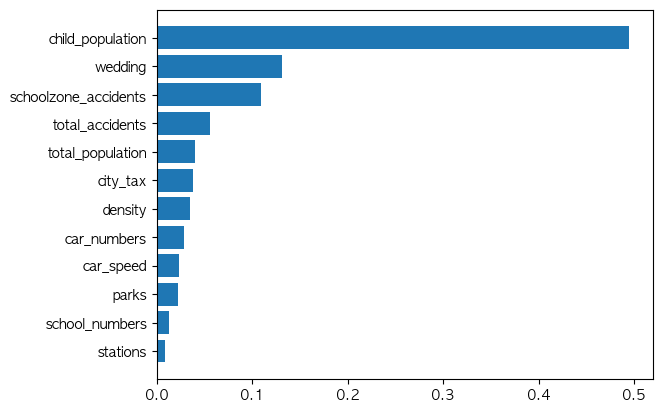

In [126]:
rf_feature_importance = pd.DataFrame({'col':select_col, 'fi' : rf_model.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='fi',ascending=True)

plt.barh(rf_feature_importance.col, rf_feature_importance.fi)
plt.show()

#### (2) Xgboost

In [127]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(n_estimators=100, random_state=42)

xgboost.fit(train.loc[:, select_col], train['child_accidents'])
predict = xgboost.predict(test.loc[:, select_col])

rmse :  6.636620104021539


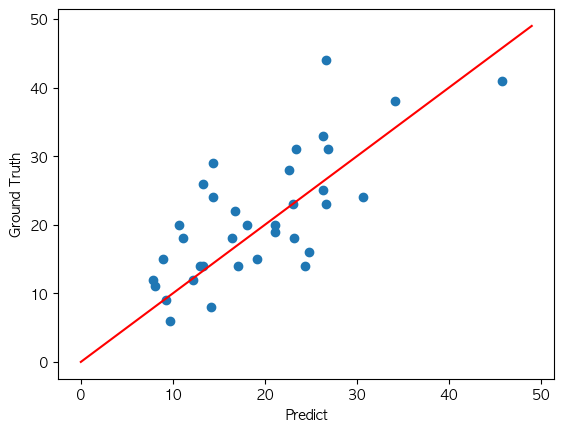

In [128]:
plt.scatter(predict, test['child_accidents'])
plt.xlabel('Predict')
plt.ylabel('Ground Truth')

x = np.arange(0,50)
y = x
plt.plot(x,y,'r')
print('rmse : ' ,root_mean_squared_error(predict, test['child_accidents']))

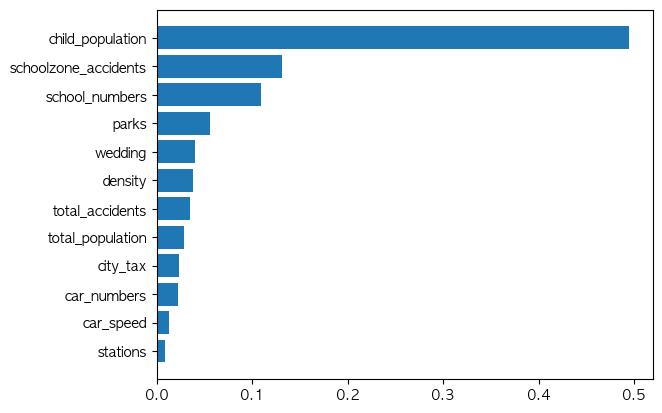

In [129]:
xgboost_feature_importance = pd.DataFrame({'col':select_col, 'xi' : xgboost.feature_importances_})
xgboost_feature_importance = xgboost_feature_importance.sort_values(by='xi',ascending=True)

plt.barh(xgboost_feature_importance.col, rf_feature_importance.fi)
plt.show()

### 종속변수에 직접적인 영향을 미치는 4개 변수 제외한 분석 결과
- ‘어린이 인구 수(child_population)’, ‘인구 수(total_population)’, ‘교통사고 수(total_accidents)’, ‘보호구역 사고 수(schoolzone_accidents)’를 제외한 분석 결과임

#### (1) Random Forest

In [130]:
# 아래 변수들을 가지고 child_accident를 예측하는 모델 구축(인과관계)
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
select_col2 = ['car_numbers', 'car_speed', 'school_numbers', 'stations', 'parks', 'city_tax', 'density', 'wedding']

# 모델학습
rf_model2.fit(train.loc[:, select_col2], train['child_accidents'])
predict2 = rf_model2.predict(test.loc[:, select_col2])

rmse :  8.593179687569506


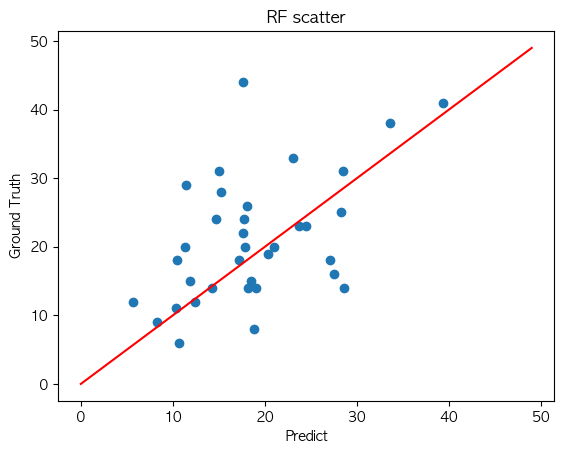

In [131]:
plt.title('RF scatter')
plt.scatter(predict2, test['child_accidents'])
plt.xlabel('Predict')
plt.ylabel('Ground Truth')

x = np.arange(0,50)
y = x
plt.plot(x,y,'r')
print('rmse : ' ,root_mean_squared_error(predict2, test['child_accidents']))

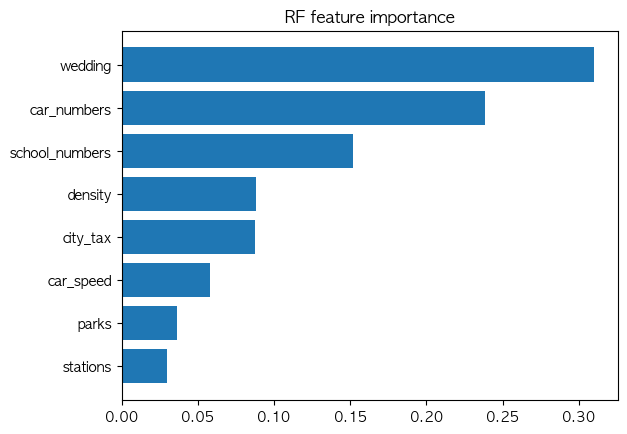

In [132]:
rf_feature_importance2 = pd.DataFrame({'col':select_col2, 'fi' : rf_model2.feature_importances_})
rf_feature_importance2 = rf_feature_importance2.sort_values(by='fi',ascending=True)

plt.title('RF feature importance')
plt.barh(rf_feature_importance2.col, rf_feature_importance2.fi)
plt.show()

#### (2) Xgboost

In [133]:
from xgboost import XGBRegressor

xgboost2 = XGBRegressor(n_estimators=100, random_state=42)

xgboost2.fit(train.loc[:, select_col2], train['child_accidents'])
predict2 = xgboost2.predict(test.loc[:, select_col2])

rmse :  9.895541524092089


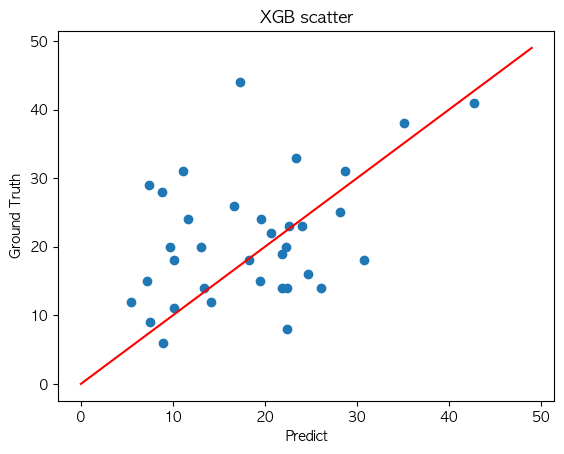

In [134]:
plt.title('XGB scatter')
plt.scatter(predict2, test['child_accidents'])
plt.xlabel('Predict')
plt.ylabel('Ground Truth')

x = np.arange(0,50)
y = x
plt.plot(x,y,'r')
print('rmse : ' ,root_mean_squared_error(predict2, test['child_accidents']))

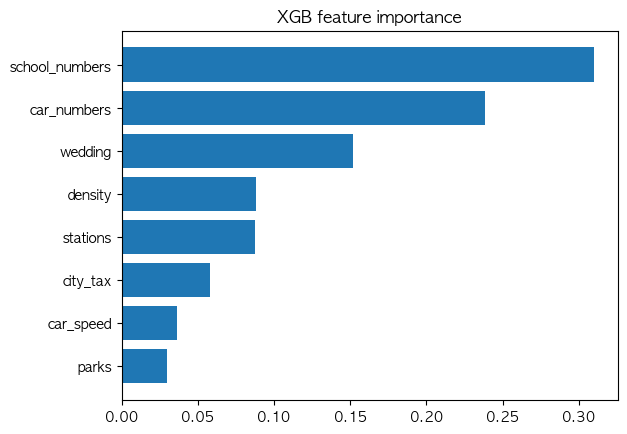

In [135]:
xgboost_feature_importance2 = pd.DataFrame({'col':select_col2, 'xi' : xgboost2.feature_importances_})
xgboost_feature_importance2 = xgboost_feature_importance2.sort_values(by='xi',ascending=True)

plt.title('XGB feature importance')
plt.barh(xgboost_feature_importance2.col, rf_feature_importance2.fi)
plt.show()

#### RMSE 비교 bar 그래프

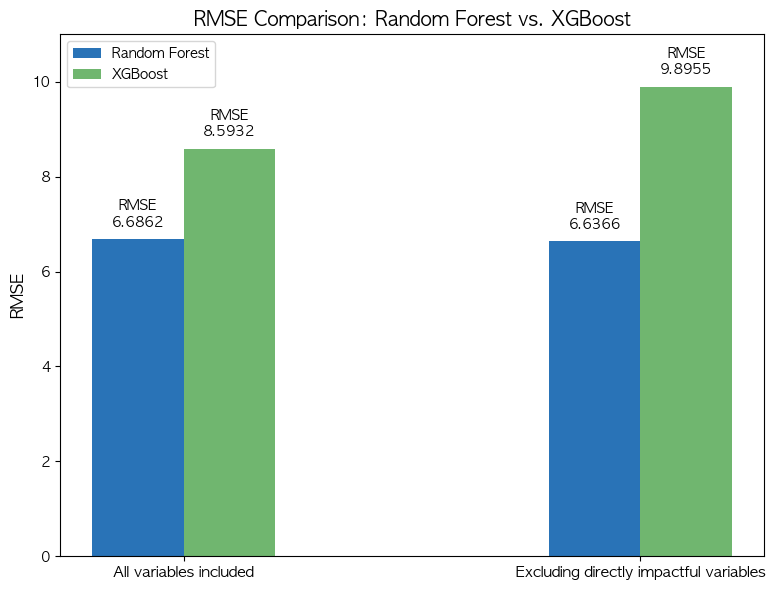

In [136]:
models = ['Random Forest', 'XGBoost']
rmse_all_vars = [6.6862, 6.6366]
rmse_excluded = [8.5932, 9.8955]

x_labels = ['All variables included', 'Excluding directly impactful variables']
x = range(len(x_labels))

bar_width = 0.20
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar([i - bar_width/2 for i in x], rmse_all_vars, width=bar_width, label='Random Forest', color='#2973B7')
ax.bar([i + bar_width/2 for i in x], rmse_excluded, width=bar_width, label='XGBoost', color='#70B66F')

for i in range(len(x)):
    ax.text(i - bar_width/2, rmse_all_vars[i] + 0.2, f"RMSE\n{rmse_all_vars[i]}", ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, rmse_excluded[i] + 0.2, f"RMSE\n{rmse_excluded[i]}", ha='center', va='bottom', fontsize=10)

# 축 설정
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=11)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('RMSE Comparison: Random Forest vs. XGBoost', fontsize=14)
ax.set_ylim(0, 11)
ax.legend()

plt.tight_layout()
plt.show()

#### 그 외 분석

- 기여도 상위 3개의 변수 ‘등록 차량대수(car_numbers)’, ‘혼인 건수(wedding)’, ‘학교 수(school_numbers)를 중심으로 ‘어린이 사고 수(child_accidents)’ 예측

In [138]:
# 아래 변수들을 가지고 child_accident를 예측하는 모델 구축(인과관계)
rf_model3 = RandomForestRegressor(n_estimators=100, random_state=42)
select_col3 = ['car_numbers', 'wedding', 'school_numbers']

# 모델학습
rf_model3.fit(train.loc[:, select_col3], train['child_accidents'])
predict3 = rf_model3.predict(test.loc[:, select_col3])

rmse :  8.825920105818186


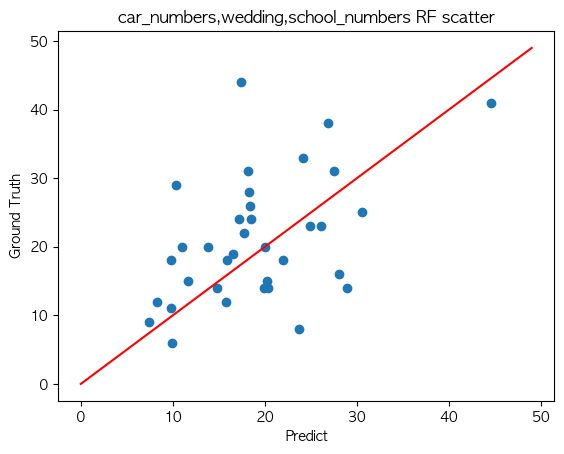

In [139]:
plt.title('car_numbers,wedding,school_numbers RF scatter')
plt.scatter(predict3, test['child_accidents'])
plt.xlabel('Predict')
plt.ylabel('Ground Truth')

x = np.arange(0,50)
y = x
plt.plot(x,y,'r')
print('rmse : ' ,root_mean_squared_error(predict3, test['child_accidents']))

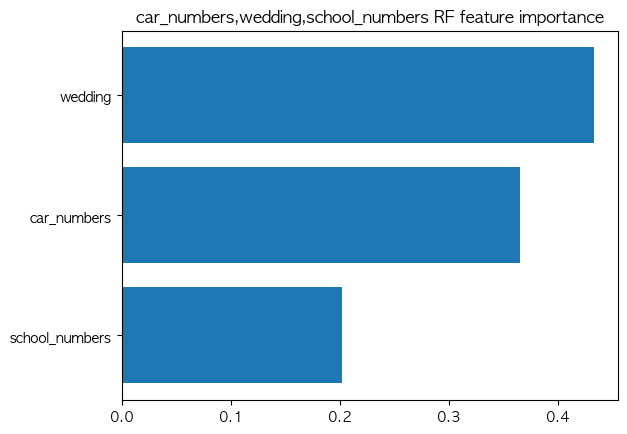

In [140]:
rf_feature_importance3 = pd.DataFrame({'col':select_col3, 'fi' : rf_model3.feature_importances_})
rf_feature_importance3 = rf_feature_importance3.sort_values(by='fi',ascending=True)

plt.title('car_numbers,wedding,school_numbers RF feature importance')
plt.barh(rf_feature_importance3.col, rf_feature_importance3.fi)
plt.show()

- 상위 세 가지 변수 중심으로 해당 변수와 양의 상관 관계인 변수들을 고려하여 다시 ‘어린이 사고 수(child_accidents)’를 예측


(1) ‘등록 차량 수(car_numbers)’ - ‘지방세(city_tax)’, ‘지하철 역 수(stations)’를 고려하여 ‘어린이 사고 수(child_accidents)를 예측한 모델링

In [142]:
# 아래 변수들을 가지고 child_accident를 예측하는 모델 구축(인과관계)
rf_model4 = RandomForestRegressor(n_estimators=100, random_state=42)
select_col4 = ['car_numbers', 'city_tax', 'stations']

# 모델학습
rf_model4.fit(train.loc[:, select_col4], train['child_accidents'])
predict4 = rf_model4.predict(test.loc[:, select_col4])

rmse :  8.646905804968618


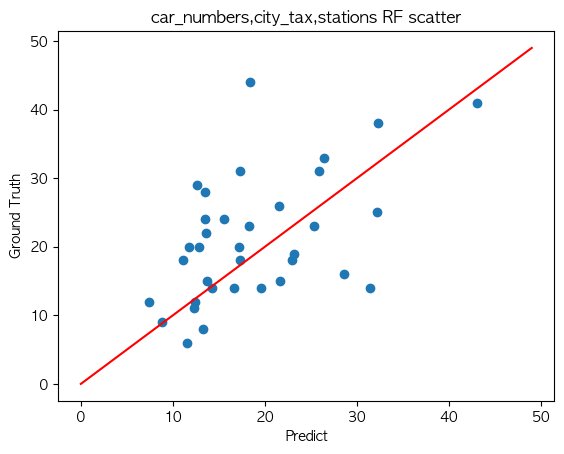

In [143]:
plt.title('car_numbers,city_tax,stations RF scatter')
plt.scatter(predict4, test['child_accidents'])
plt.xlabel('Predict')
plt.ylabel('Ground Truth')

x = np.arange(0,50)
y = x
plt.plot(x,y,'r')
print('rmse : ' ,root_mean_squared_error(predict4, test['child_accidents']))

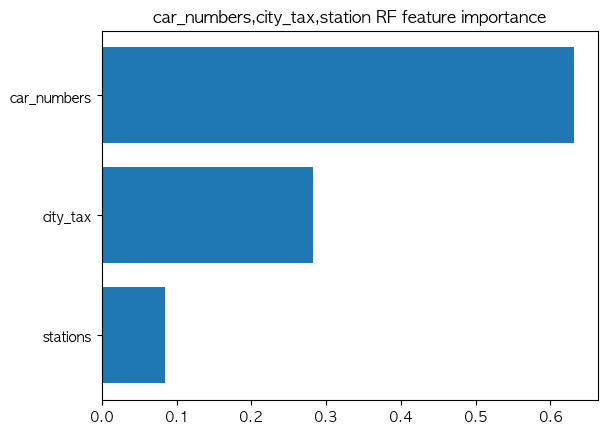

In [144]:
rf_feature_importance4 = pd.DataFrame({'col':select_col4, 'fi' : rf_model4.feature_importances_})
rf_feature_importance4 = rf_feature_importance4.sort_values(by='fi',ascending=True)

plt.title('car_numbers,city_tax,station RF feature importance')
plt.barh(rf_feature_importance4.col, rf_feature_importance4.fi)
plt.show()

(2) ‘학교 수(school_numbers)’ - ‘혼인 건수(wedding)’, ‘인구 밀집도(density)’, ‘공원 수(parks)’를 고려하여 ‘어린이 사고 수(child_accidents)’를 예측한 모델링

(3) ‘혼인 건수(wedding)’ - ‘학교 수(school_numbers)’, ‘인구 밀집도(density)’를 고려하여 ‘어린이 사고 수(child_accidents)’ 를 예측한 모델링

- 직접적인 영향을 주는 변수를 고려하여 어린이 사고 수(child_accidents)를 예측한 모델링

‘인구 수(total_population)’, ‘어린이 인구 수(child_population)’ , ‘교통사고 수(total_accidents)’를 고려하여 ‘어린이 사고 수(child_accidents)’ 를 예측한 모델링